# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Regression

Let’s start by talking about a few examples of supervised learning problems. Suppose we have a dataset giving the living areas and prices of 47 houses from Portland, Oregon:

In [2]:
import pandas as pd
df = pd.read_csv('data/portland.csv')
print(len(df))
df.head(2)

47


,Size of the house (in square feet),Number of bedrooms,Price of the house
0,2104,3,399900
1,1600,3,329900


In [3]:
df.columns

Index(['Size of the house (in square feet)', 'Number of bedrooms',
       'Price of the house'],
      dtype='object')

* Lets say that our goal would be to predict the price of the house given the size and the number of bedrooms

In the case of simple linear regression we could set $x$ to be the size in square feet and $y$ to be the price, the goal would then be to find a function $f(x)$ that is close to $y$ in some sense.

In the context of machine learning they often use the following terminology: let $x^{(i)}$ denote the **features**(living area) and let $y^{(i)}$ denote the **target** (price), then a pair $(x^{(i)},y^{(i)}$ would be called a **training example**.

In this terminology they also call the set of observations $\{(x^{(i)},y^{(i)}),\, i=1,\ldots,m\}$ a training set. 

> **In this context the goal is statistical prediction**

> Contrast this with the **statistical estimation** viewpoint of linear regression, where the goal is to estimate the parameters.

Why is this difference, basically it is one of explainability. Estimation is often used as a tool to explain something through its statistical model and the estimated parameters of the model. Lets assume that there is a linear relationship between fat percentage and BMI, but we do not know the parameters. Then by simply taking a few observations and performing a parameter estimation under a given loss, such as the maximum likelihood estimator (MLE), we can do hypothesis tests to check if the parameters are positive or test between different proposed values of said parameters. The goal in statistical machine learning is often one of prediction, and as you will see, the models that are often in use, do not allow us to actually explain anything, although the prediction is also accomplished by first estimating parameters of a model but with the explicit goal of predicting future from past observations.

> In conclusion, in statistical machine learning we are often using weaker model assumptions, but since we are focusing on prediction we do not really have a problem. In contrast, in classical statistical decision problems, the focus is on stronger model assumptions and the goal is to extract more detailed information about the relationships between features and targets to obtain a better explainable understanding of the underlying data generating process.

> Think of the name, machine learning. From this you get that the focus has to be the behavior of the machine (prediction).

It is important to bear in mind that estimation for explainability and estimation for predictability are both formally statistical decision problems. Here, we take such a mathematical approach.

#### The Portland house price example using Sci-kit learn

In [4]:
from Utils import showURL
showURL('https://scikit-learn.org/stable/',600)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
#?LinearRegression

In order to use sci-kit learns framework to "train" a linear regression model we will first have to prepare the data in the way that it expects. The format is as follows

* X -- a numpy array of shape (n_samples,n_features)
* Y -- a numpy array of length n_samples

In [7]:
df[['Size of the house (in square feet)','Number of bedrooms']].to_numpy().dtype

dtype('int64')

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df[['Size of the house (in square feet)','Number of bedrooms']].to_numpy() # To convert from dataframe to numpy array
Y = df['Price of the house'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,test_size=0.5)

In [9]:
#help(train_test_split)

Let's note the shapes of `X` and `Y` now.

In [10]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(47, 2) (23, 2) (24, 2) (23,) (24,)


In [11]:
lr.fit(X_train,Y_train)

LinearRegression()

This now gives us a fitted model for this particular data, so lets plot it.

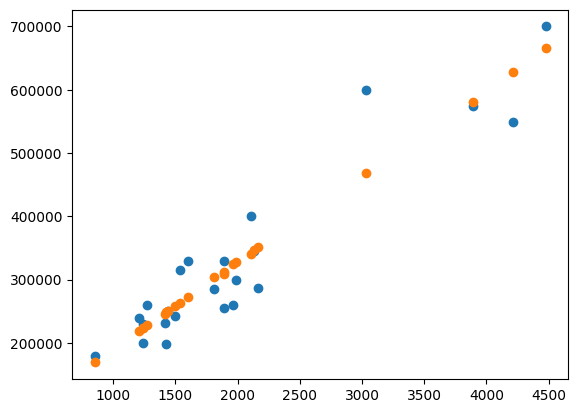

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0],Y_train)
plt.scatter(X_train[:,0],lr.predict(X_train))

In [13]:
from Utils import scatter3d

In [14]:
scatter3d(X_train[:,0],X_train[:,1],Y_train)
scatter3d(X_train[:,0],X_train[:,1],lr.predict(X_train))

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'size': 2},
              'mode': 'markers',
              'type': 'scatter3d',
              'x': array([4478, 1985, 1236, 1811, 1268, 2132, 1427, 4215, 1600, 1890, 1437, 3890,
                          1534, 1962, 1239, 1888, 3031, 1494, 2162, 1203, 1416, 2104,  852]),
              'y': array([5, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 2, 4, 3, 4, 3, 2, 3, 2]),
              'z': array([665662.80794088, 327476.54077895, 223780.93804447, 304081.25659869,
                          228083.51904313, 347241.52224158, 249461.96838027, 627312.65412368,
                          272722.79690432, 311714.93720476, 250806.52494235, 580626.24962156,
                          263848.72359457, 324384.06068615, 224184.30501309, 308457.70965795,
                          468117.15717294, 258470.49734623, 351275.19192783, 219343.90138959,
                          244994.63992759, 340488.44763336, 169161.64982605])}],
    'layout': {'template': '...'}
})

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,1],Y_train)
plt.scatter(X_train[:,1],lr.predict(X_train))

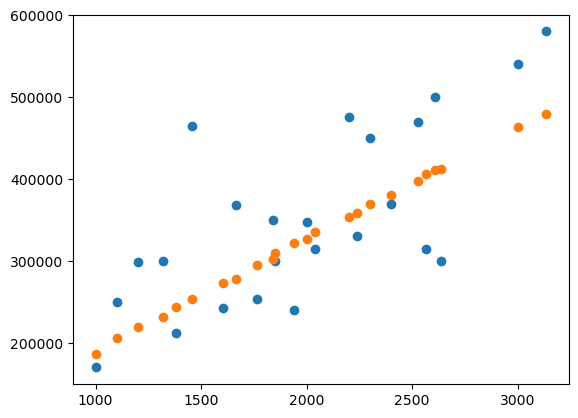

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0],Y_test)
plt.scatter(X_test[:,0],lr.predict(X_test))

As we can see here, since the x-axis is size and the y axis is price we have an underlying variable which is number of bedrooms the line is not straight.

Let's also plot the number of bedrooms `x[1]` against the price (y-axis) next to appreciate the other discrete feature.

But remember, this is a linear model so if we consider the full 3-d space the predictions would be on a plane instead of a line.

In [ ]:
plt.scatter(X_train[:,1],Y_train)
plt.scatter(X_train[:,1],lr.predict(X_train))

In [ ]:
plt.scatter(X_test[:,1],Y_test)
plt.scatter(X_test[:,1],lr.predict(X_test))

In [ ]:
lr.score(X_train,Y_train) # Score returns R^2

0.8829506572411265

In [ ]:
lr.score(X_test,Y_test) # Score returns R^2

0.44440818383631375

In [ ]:
predictions_train = lr.predict(X_train)
residual_train = Y_train - predictions_train
np.mean(np.abs(residual_train))

36475.71776324453

In [ ]:
Y_train

array([699900, 299900, 199900, 285900, 259900, 345000, 198999, 549000,
       329900, 329999, 249900, 573900, 314900, 259900, 229900, 255000,
       599000, 242500, 287000, 239500, 232000, 399900, 179900])

In [ ]:
predictions_test = lr.predict(X_test)
residual_test = Y_test - predictions_test
np.mean(np.abs(residual_test))

In [ ]:
import matplotlib.pyplot as plt
_=plt.hist(np.abs(residual_test))

In [ ]:
np.mean(np.minimum(np.abs(residual_test),200000))

In [ ]:
from Utils import epsilon_bounded
epsilon_bounded(len(residual_test),200000,0.05)

In [ ]:
from Utils import print_confidence_interval
print_confidence_interval(np.mean(np.minimum(np.abs(residual_test),200000)),epsilon_bounded(len(residual_test),200000,0.05))

## Calibration

Often we want to know if our predictions are calibrated, the concept is easiest to understand simply by looking at the following plot of the predicted value versus the true value

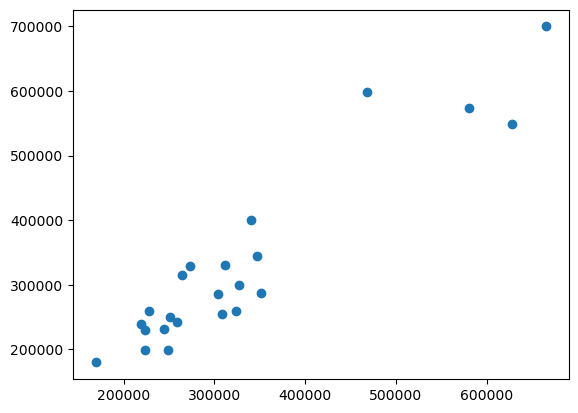

In [ ]:
plt.scatter(lr.predict(X_train),Y_train)

Here it looks quite good.

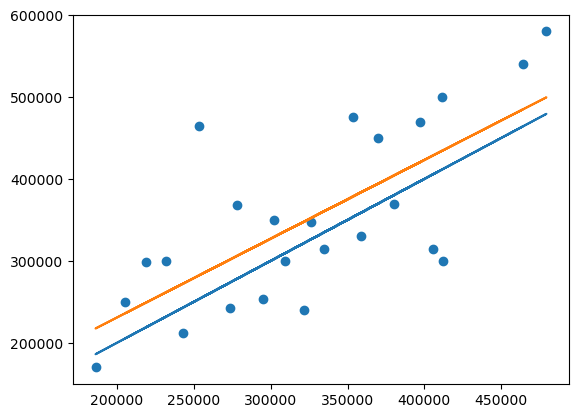

In [ ]:
X_new = lr.predict(X_test)
plt.scatter(X_new,Y_test)
lr_calib = LinearRegression()
lr_calib.fit(X_new.reshape(-1,1),Y_test)
plt.plot(X_new,X_new)
plt.plot(X_new,lr_calib.predict(X_new.reshape(-1,1)))

In [ ]:
np.sqrt(np.mean((lr_calib.predict(X_new.reshape(-1,1))-X_new)**2))

26234.398560870508

Here, maybe not so good. We are underestimating the price.

Here calibration would mean that the predictions and the true values "follow" a straight line with slope $1$ and intercept $0$. Actually the mean square calibration error is the following
$$
    \mathbb{E}[|\mathbb{E}[Y \mid f(X)] - f(X)|^2]^{1/2}
$$
Thus it is checking for every predicted value $f(X)$ the variance of the true values, we want this to be small.
Lets compute the calibration error here

In [ ]:
predictions = lr.predict(X_test).reshape(-1,1)

lr_calib = LinearRegression()
lr_calib.fit(predictions,Y_test)

calibration_residual = (lr_calib.predict(predictions)-predictions)
np.sqrt(np.mean(calibration_residual**2))

In [ ]:
np.sqrt(np.mean((Y_test-predictions)**2))

In [ ]:
plt.scatter(predictions,lr_calib.predict(predictions))
plt.scatter(predictions,Y_test)
plt.scatter(predictions,predictions)

In the above we can see that we are not entirely calibrated, but that we have a simple additive bias, i.e. we are underestimating.

Lets try another model and see if we can change the calibration

In [ ]:
lr2 = LinearRegression()
lr2.fit(X_train[:,0:1]**2,Y_train)

In [ ]:
plt.scatter(lr2.predict(X_test[:,0:1]**2),Y_test)

In [ ]:
predictions_lr2 = lr2.predict(X_test[:,0:1]**2).reshape(-1,1)

lr2_calib = LinearRegression()
lr2_calib.fit(predictions_lr2,Y_test)

calibration_residual_lr2 = (lr2_calib.predict(predictions_lr2)-predictions_lr2)
np.sqrt(np.mean(calibration_residual_lr2**2))

In [ ]:
plt.scatter(predictions_lr2,lr2_calib.predict(predictions_lr2))
plt.scatter(predictions_lr2,Y_test)
plt.scatter(predictions_lr2,predictions_lr2)

In [ ]:
np.sqrt(np.mean((Y_test-predictions_lr2)**2))

The above is a bit more complicated, we are always underestimating, but less so at smaller prices and more at higher prices. Interestingly this gives a smaller calibration error.

The calibration error is a bit tricky to get confidence bounds for, but can be done.

## More about measuring the model

We will illustrate this with an example built upon the Portland data that we saw earlier.

In [ ]:
import ssl
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context

import sklearn.datasets as datasets
california_housing = datasets.fetch_california_housing()
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
X = california_housing.data
Y = california_housing.target
# For the purpose of exposition we normalize the Y variable between 0 and 1
Y = Y/np.max(Y)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.9,random_state=0)

`X_train,Y_train` will now be different from `X_test,Y_test`. What this means is that if we assume that the original data is IID we can consider the two samples independent. So, let us train a simple linear regression model

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(18576, 8) (2064, 8) (18576,) (2064,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
residual = Y_test-lr.predict(X_test)

In [ ]:
len(residual)

2064

In [ ]:
from Utils import plotEDF, makeEDF

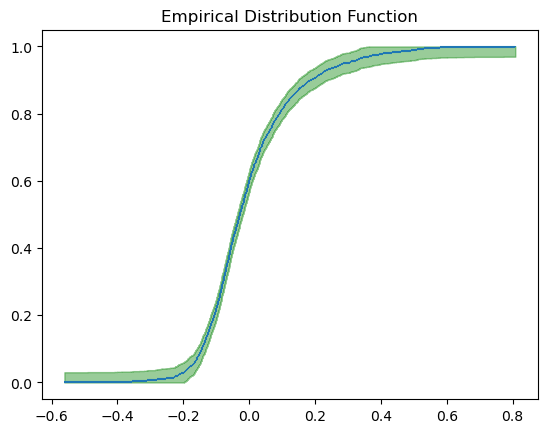

In [ ]:
edf = makeEDF(residual)
plotEDF(edf,points_at_jump=False,confidence_band=True)

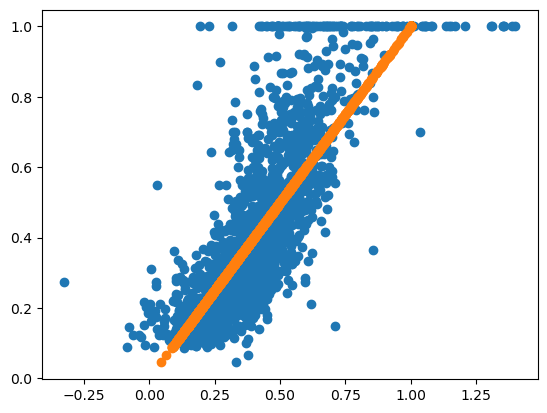

In [ ]:
predictions = lr.predict(X_test).reshape(-1,1)
plt.scatter(predictions,Y_test)
plt.scatter(Y_test,Y_test)

In [15]:
predictions = lr.predict(X_test).reshape(-1,1)

from sklearn.ensemble import RandomForestRegressor
lr_calib = RandomForestRegressor(min_samples_leaf=100)
lr_calib.fit(predictions,Y_test)

calibration_residual = (lr_calib.predict(predictions)-predictions)
np.sqrt(np.mean(calibration_residual**2))

83337.68041759958

(0.0, 1.0)

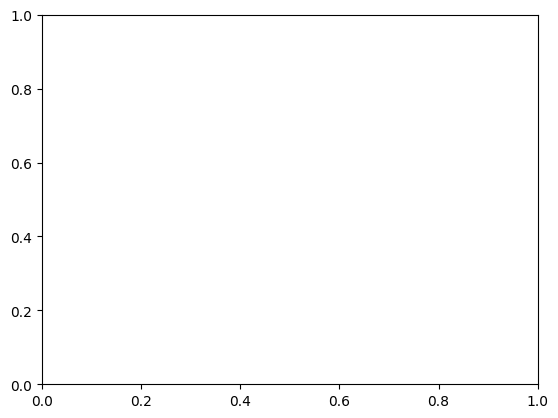

In [16]:
import matplotlib.pyplot as plt
plt.scatter(predictions,Y_test,alpha=0.1)
plt.scatter(predictions,lr_calib.predict(predictions),alpha=0.1)
plt.scatter(predictions,predictions)
plt.xlim(0,1)
plt.ylim(0,1)

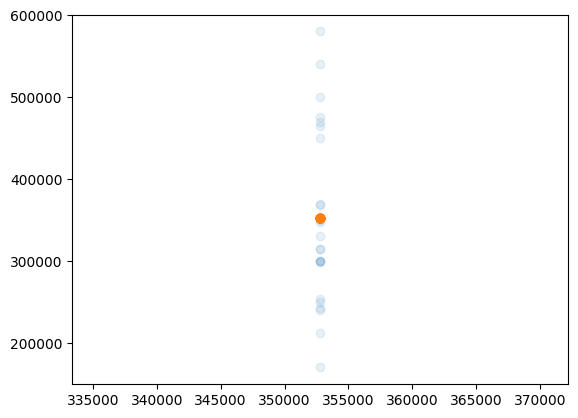

In [17]:
predictions_calibrated = lr_calib.predict(lr.predict(X_test).reshape(-1,1))
plt.scatter(predictions_calibrated,Y_test,alpha=0.1)
plt.scatter(predictions_calibrated,predictions_calibrated)

We can see in the above plot that the true values is pretty much centered around the predicted values. However for a true test, one would now need to check this on a certain validation set, we will look into this later.

In [ ]:
np.mean((lr_calib.predict(lr.predict(X_test).reshape(-1,1))-Y_test)**2)

In [ ]:
np.mean(((lr.predict(X_test).reshape(-1,1))-Y_test)**2)

What about the mean square error?
$$
    \mathbb{E}[|Y-f(X)|^2]^{1/2} = \left ( \mathbb{E}[|\mathbb{E}[Y \mid f(X)]-f(X)|^2+|Y-\mathbb{E}[Y \mid f(X)]|^2] \right )^{1/2}
$$

The first term is the calibration term (can be thought of as bias) and the second term is just the variance at the predicted value. For this particular problem, most of the contribution comes from the calibration error

In [ ]:
np.sqrt(np.mean((Y_test-predictions)**2))

### Measuring how good a model is (explained variance)

The **coefficient of determination** or **explained variance** is defined as follows:

$$R^2 = 1- \frac{MSE}{Var(y)}$$

MSE - Mean Squared Error and is the sum of squares of the residual.

To make it fit the exposition we did in the chapter about regression and finding confidence bounds for $R^2$ or FVU explicitly we need to figure out the max and min of the values. 

In [ ]:
from Utils import bennett_epsilon

In [ ]:
n = len(Y_test)
alpha=0.05
import scipy.optimize as so
h = lambda u: (1+u)*np.log(1+u)-u
sigma2 = np.var(np.power(Y_test-np.mean(Y_test),2))
f = lambda epsilon: np.exp(-n*sigma2*h(epsilon/sigma2))-alpha/2
ans = so.fsolve(f,0.001)
epsilon2 = np.abs(ans[0])
print(epsilon2,f(epsilon2))

In [ ]:
X = np.power(residual,2)
sigma2 = np.var(X)
b = np.max(X)-np.min(X)
f = lambda epsilon: np.exp(-n*sigma2/(b**2)*h(b*epsilon/sigma2))-alpha/2
ans = so.fsolve(f,0.001)
epsilon1 = np.abs(ans[0])
print(epsilon1,f(epsilon1))

In [ ]:
lowerBound = (np.mean(np.power(residual,2))-epsilon1)/(np.var(Y_test,ddof=1)+epsilon2)
upperBound = (np.mean(np.power(residual,2))+epsilon1)/(np.var(Y_test,ddof=1)-epsilon2)
print(lowerBound,upperBound)

This tells us the confidence interval for the FVU using Bennett's inequality. This is not too bad, and we could get smaller by having a bigger test set.

Key takeaway here is that, for measuring regression performance we often need more testing data than we need for the classification problems. This is essentially due to the metrics being used.

## More interesting example

In our derivation, we might as well have considered multiple features, like multiple linear regression. The extension is the same, now $\beta_0$ is still a number, but $\beta_1,x$ are vectors in $\mathbb{R}^d$ where $d$ is the number of features, $f(x) = \beta_0 + \beta_1 \cdot x$. With this simple extension we can consider a more interesting example. Consider a dataset of 8x8 bitmaps representing handwritten digits, this can look like follows

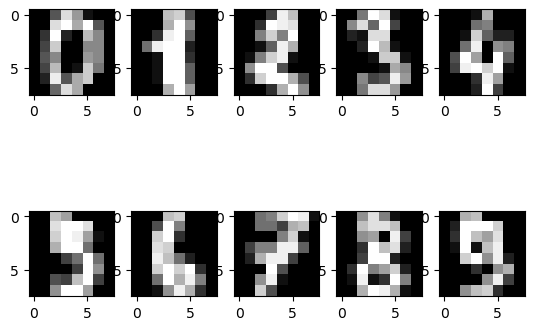

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(2,5)
plt.gray()
for i in range(10):
    from math import floor
    row = floor(i/5)
    column = i % 5
    ax[row,column].imshow(digits['data'][i,:].reshape(8,8))

Lets first build a classifier that distinguishes the  top row from the bottom row, so let us construct the target for this problem

In [ ]:
target = (digits['target'] >= 5)*1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(digits['data'],target)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(sc.transform(X_train),Y_train)

LogisticRegression()

In [ ]:
logReg.score(sc.transform(X_train),Y_train)

0.9138827023014106

We can with the same methods as before construct confidence bands around the residual ECDF using the DKW inequality:

In [ ]:
from Utils import makeEDF,plotEDF
edf = makeEDF(logReg.predict(X_test)-Y_test)
plotEDF(edf)

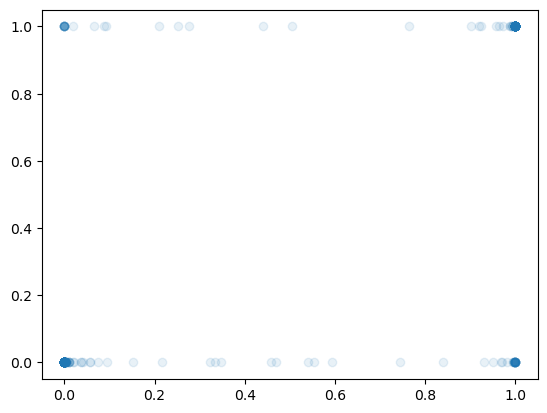

In [ ]:
plt.scatter(logReg.predict_proba(X_test)[:,1],Y_test,alpha=0.1)

In [ ]:
predictions = logReg.predict_proba(X_test)[:,1].reshape(-1,1)

from sklearn.ensemble import RandomForestRegressor
lr_calib = RandomForestRegressor(min_samples_leaf=30)
lr_calib.fit(predictions,Y_test)

calibration_residual = (lr_calib.predict(predictions)-predictions)
np.sqrt(np.mean(calibration_residual**2))

0.6317027478996654

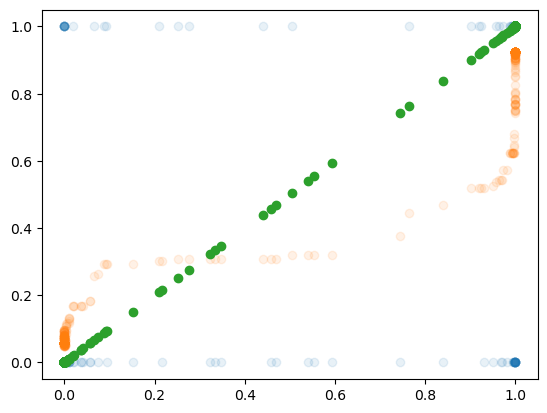

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(predictions,Y_test,alpha=0.1)
plt.scatter(predictions,lr_calib.predict(predictions),alpha=0.1)
plt.scatter(predictions,predictions)

Here you see its not very well calibrated. Simply because we are not minimizing the $L^2$ norm, we are minimizing the cross entropy loss.

In [ ]:
np.sqrt(np.mean((Y_test-predictions)**2))

Again we see that the root mean square error (RMS) is roughly of the same size as the calibration error.

How to calibrate

In [ ]:
from sklearn.model_selection import train_test_split
X_tt,X_valid,Y_tt,Y_valid = train_test_split(digits['data'],target,random_state=0) # First split
X_train,X_test,Y_train,Y_test = train_test_split(X_tt,Y_tt,random_state=0) # Second split

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(sc.transform(X_train),Y_train)

predictions = logReg.predict_proba(X_test)[:,1].reshape(-1,1)

from sklearn.ensemble import RandomForestRegressor
lr_calib = RandomForestRegressor(min_samples_leaf=30)
lr_calib.fit(predictions,Y_test)

RandomForestRegressor(min_samples_leaf=30)

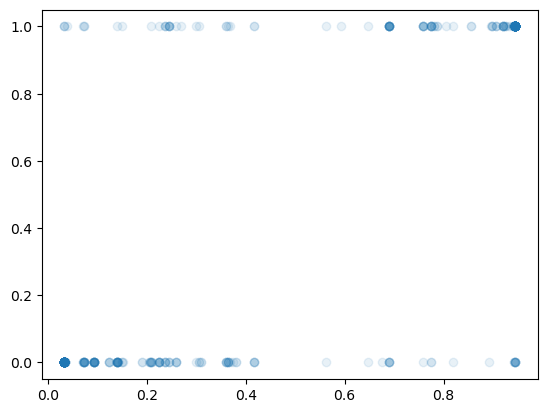

In [ ]:
plt.scatter(lr_calib.predict(logReg.predict_proba(X_valid)[:,1:2]),Y_valid,alpha=0.1)

In [ ]:
predictions_valid = lr_calib.predict(logReg.predict_proba(X_valid)[:,1:2]).reshape(-1,1)

from sklearn.ensemble import RandomForestRegressor
lr_calib_valid = RandomForestRegressor(min_samples_leaf=30)
lr_calib_valid.fit(predictions_valid,Y_valid)

RandomForestRegressor(min_samples_leaf=30)

In [ ]:
calibration_residual = (lr_calib_valid.predict(predictions_valid)-predictions_valid)
np.sqrt(np.mean(calibration_residual**2))

0.5600686495900018

This is a better calibration, lets check the curve

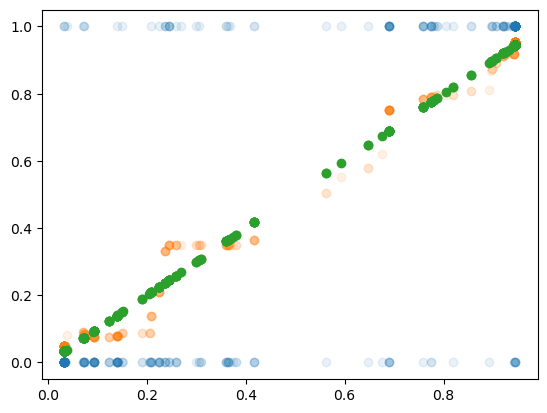

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(predictions_valid,Y_valid,alpha=0.1)
plt.scatter(predictions_valid,lr_calib_valid.predict(predictions_valid),alpha=0.1)
plt.scatter(predictions_valid,predictions_valid)

In [ ]:
logReg.score(X_valid,Y_valid)

0.8511111111111112

In [ ]:
np.mean(Y_valid == (lr_calib_valid.predict(predictions_valid) >= 0.5)*1)

0.8866666666666667

We also see on the graph that it is much more calibrated. 

We can also check the MSE

In [ ]:
np.sqrt(np.mean((Y_valid-predictions_valid)**2))

Which is an improvement from before.

## Multiple classes

The above example naturally leads us to wanting to model multiple outputs. That is, instead of the Bernoulli we could consider DeMoivre$(p_1,\ldots,p_m)$ for $m$ classes. What we want is the following

$$
    \sum_{i=1}^m p_i = 1
$$

$Y_i \mid X_i \sim \text{DeMoivre}(\theta(X_i))$, where $\theta \in [0,1]^m$. But how do we find a good model for $\theta$?

Let us model each log-ratio as a linear function
$$
    \log\left ( \frac{P(Y = i \mid X)}{P(Y = m \mid X)}\right ) = w_{i} \cdot x, \quad \forall i=1,\ldots,m-1
$$
now fix $i$ and consider

$$
    P(Y = i \mid X) = e^{w_i \cdot x} P(Y = m \mid X), \quad \forall i=1,\ldots, m-1
$$
Now
$$
    \sum P(Y = i \mid X) = 1
$$
Hence
$$
    P(Y = m \mid X) = 1-\sum_{i=1}^{m-1} P(Y = i \mid X) = 1-\sum_{i=1}^{m-1} e^{w_i \cdot x} P(Y = m \mid X)
$$
Hence
$$
    P(Y = m \mid X) = \frac{1}{1+\sum_{i=1}^{m-1} e^{w_i \cdot x}}
$$

Plugging back in gives
$$
    P(Y = i \mid X) = \frac{e^{w_i \cdot x}}{1+\sum_{j=1}^{m-1} e^{w_j \cdot k}}
$$

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(digits['data'],digits.target)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(sc.transform(X_train),Y_train)

In [ ]:
logReg.score(sc.transform(X_train),Y_train)